# Lesson 6 Assignment - Advertising Sales Regression

## Author - Connor Higgins



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market.
 2. 'radio': advertising dollars spent radio ads.
 3. 'newspaper': advertising dollars spent on newspaper ads.

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


#### Preparing Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
%matplotlib inline
sns.set()

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
ad_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### 1. TV Regression

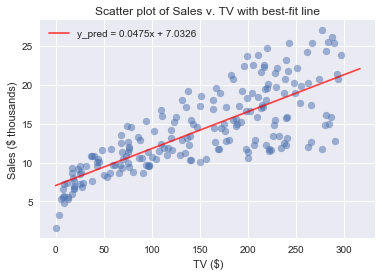

In [3]:
TV_ols_model = sm.ols(formula = 'sales ~ TV', data=ad_data) # Creating linear model using sm.ols
TV_results = TV_ols_model.fit() # Fitting model to data

Intercept, Slope = TV_results.params # Obtaining slope and intercept from fitted model
x_dummy = np.linspace(0, np.max(ad_data['TV']+20), 100) # creating extrapolated x_interval for plot
y_pred = Slope * x_dummy + Intercept # creating y_pred array based on x_dummy and fitted model params

plt.scatter(ad_data['TV'], ad_data['sales'], alpha=0.5, label='') # plotting points
plt.plot(x_dummy, y_pred, color='red', alpha=0.7,
         label=f"y_pred = {Slope:.4f}x + {Intercept:.4f}") # plotting best-fit with equation label
plt.title('Scatter plot of Sales v. TV with best-fit line')
plt.ylabel('Sales ($ thousands)')
plt.xlabel('TV ($)')
plt.legend()
plt.show()

 Feature 'TV' represents "advertising dollars spent on TV ads for a single product in a given market." 
 
 One can therefore interpet the best fit line parameters as follows: Hypothetically, without TV ads one would see roughly \$7,032.60 in total sales, with each additional dollar spent on TV adverstising increasing total sales by $47.50. 
 
Overall, TV advertising is a fairly good investment.

### 2. Radio Regression

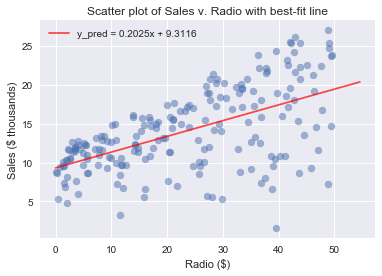

In [4]:
radio_ols_model = sm.ols(formula = 'sales ~ radio', data=ad_data)
radio_results = radio_ols_model.fit()

Intercept, Slope = radio_results.params
x_dummy = np.linspace(0, np.max(ad_data['radio']+5), 100)
y_pred = Slope * x_dummy + Intercept

plt.scatter(ad_data['radio'], ad_data['sales'], alpha=0.5, label='')
plt.plot(x_dummy, y_pred, color='red', alpha=0.7, label=f"y_pred = {Slope:.4f}x + {Intercept:.4f}")
plt.title('Scatter plot of Sales v. Radio with best-fit line')
plt.ylabel('Sales ($ thousands)')
plt.xlabel('Radio ($)')
plt.legend()
plt.show()

 Feature 'radio' represents "advertising dollars spent on radio ads".
 
 One can therefore interpet the best fit line parameters as follows: Hypothetically, without Radio ads one would see roughly \$9311.60 in total sales, with each additional dollar spent on Radio adverstising increasing total sales by $202.50. 
 
Clearly, Radio advertising is a critical investment, being more than four times as effective as TV advertising.

### 3. Newspaper Regression

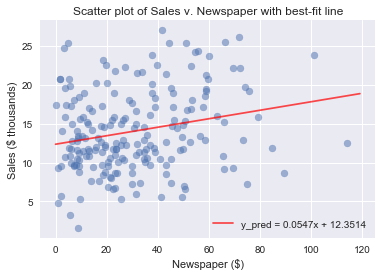

In [5]:
newspaper_ols_model = sm.ols(formula = 'sales ~ newspaper', data=ad_data)
newspaper_results = newspaper_ols_model.fit()

Intercept, Slope = newspaper_results.params
x_dummy = np.linspace(0, np.max(ad_data['newspaper']+5), 100)
y_pred = Slope * x_dummy + Intercept

plt.scatter(ad_data['newspaper'], ad_data['sales'], alpha=0.5, label='')
plt.plot(x_dummy, y_pred, color='red', alpha=0.7, label=f"y_pred = {Slope:.4f}x + {Intercept:.4f}")
plt.title('Scatter plot of Sales v. Newspaper with best-fit line')
plt.ylabel('Sales ($ thousands)')
plt.xlabel('Newspaper ($)')
plt.legend()
plt.show()

 Feature 'newspaper' represents "advertising dollars spent on newspaper ads".
 
 One can therefore interpet the best fit line parameters as follows: Hypothetically, without Newspaper ads one would see roughly \$12,351.40 in total sales, with each additional dollar spent on Newspaper adverstising increasing total sales by $54.70.
 
Newspaper advertising is slightly more effective than TV advertising (+\$7.20) and roughly a fourth as effective as Radio advertising.

### 4. Regression for all three features: TV, Radio, and Newspaper.

In [6]:
media_ols_model = sm.ols(formula = 'sales ~ TV + radio + newspaper', data=ad_data)
media_results = media_ols_model.fit()
Intercept, TVconst, radio_const, newspaper_const = media_results.params

print(f'===OLS Regression Parameters===')
print(f'Intercept:{Intercept:.4f}')
print(f'TV-constant:{TVconst:.4f}')
print(f'Radio-constant:{radio_const:.4f}')
print(f'Newspaper-constant:{newspaper_const:.4f}')
print(f'MSE:{media_results.mse_model:.4f}')

media_results.summary()

===OLS Regression Parameters===
Intercept:2.9389
TV-constant:0.0458
Radio-constant:0.1885
Newspaper-constant:-0.0010
MSE:1620.1078


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           1.58e-96
Time:                        11:50:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Equation

We can write our regression equation as follows, with the partial slope constants representing the total amount earned or lost in sales when one dollar is invested into a particular medium. While the original data is in thousands of dollars, this equation is written in dollars for readability.

$$
TotalSales = \$2938.90 + \$45.80(advert_{TV}) + \$188.50(advert_{Radio}) - \$1.00(advert_{Newspaper})
$$

Further interpeting this equation, we can state the following:
<li>Based on the y-intercept, total sales will hypothetically be \$2,938.90 if one does not invest in any TV, Radio, or Newspaper advertising.</li>
<li>Based on the TV-related constant, for every dollar one invests in TV advertising, total sales will increase by \$45.80.</li>
<li>Based on the Radio-related constant, for every dollar one invests in Radio advertising, total sales will increase by \$188.50.</li>
<li>Based on the Newspaper-related constant, for every dollar one invests in Newspaper advertising, total sales will actually decrease by \$1.00.</li>

Based on our model, one should primarily invest in Radio advertising with some additional TV advertising. Newspaper advertising may not be a worthwhile investment.

##### R-Squared & MSE

Our OLS Model had an adjusted R-Squared value of 0.896. We can interpret this number as stating that 89.6% of the variation in total sales can be explained by variations in our three features, TV, Radio, & Newspaper advertising.

Finally, the Mean Squared Error (MSE) for our OLS Model was 1620.1078. This represents the average squared difference between our model's predicted values and our actual values; moreover, like R-Squared, it provides a measure of the quality of our model, with values closer to zero representing stronger models. 